In [30]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

### Data preprocessing

In [31]:
df = pd.read_csv('brain_stroke.csv')

In [32]:
# Checking if there are any duplicates
df.duplicated().value_counts()

False    4981
dtype: int64

In [33]:
df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [34]:
df_revised = df.copy()

### Text to number

In [35]:
df_revised['gender']=df_revised['gender'].str.replace('Male', '1')
df_revised['gender']=df_revised['gender'].str.replace('Female', '2')
df_revised['gender']=df_revised['gender'].astype(int)

In [36]:
df_revised['Residence_type'] = df_revised['Residence_type'].str.replace('Urban','1')
df_revised['Residence_type'] = df_revised['Residence_type'].str.replace('Rural','2')
df_revised['Residence_type'] = df_revised['Residence_type'].astype(int)

In [37]:
df_revised['smoking_status'] = df_revised['smoking_status'].str.replace('never smoked','0')
df_revised['smoking_status'] = df_revised['smoking_status'].str.replace('formerly smoked','1')
df_revised['smoking_status'] = df_revised['smoking_status'].str.replace('smokes','2')
df_revised['smoking_status'] = df_revised['smoking_status'].str.replace('Unknown','3')
df_revised['smoking_status'] = df_revised['smoking_status'].astype(int)

In [38]:
df_revised['ever_married'] = df_revised['ever_married'].str.replace('Yes','0')
df_revised['ever_married'] = df_revised['ever_married'].str.replace('No','1')
df_revised['ever_married'] = df_revised['ever_married'].astype(int)

In [39]:
df_revised['work_type'] = df_revised['work_type'].str.replace('children','0')
df_revised['work_type'] = df_revised['work_type'].str.replace('Self-employed','1')
df_revised['work_type'] = df_revised['work_type'].str.replace('Private','2')
df_revised['work_type'] = df_revised['work_type'].str.replace('Govt_job','3')
df_revised['work_type'] = df_revised['work_type'].astype(int)

In [40]:
value_counts = df.smoking_status.value_counts()
#print(value_counts)

In [41]:
from collections import Counter
x = df_revised
x_df = pd.DataFrame(x)
#print(x_df)
y = df_revised.stroke
#print(Counter(y))

### Data imbalance -> smote

In [42]:
from imblearn.over_sampling import SMOTE
print(Counter(y))

Counter({0: 4733, 1: 248})


## Training

### Train_test split in different ratio

In [43]:
def model_training_and_performance_ratio(model, X, y):
    smo = SMOTE(random_state=2023)

    ratio = 100
    ratiovalues = [i for i in range(5, ratio, 5)]

    train_scores = []
    test_scores = []
    train_f1_score = []
    test_f1_score =[]

    for i in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i / 100, random_state=71, shuffle=True)
        X_train, y_train = smo.fit_resample(X_train, y_train)
        X_test, y_test = smo.fit_resample(X_test, y_test)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        train_acc = accuracy_score(y_pred_train, y_train)
        train_scores.append(train_acc)

        y_pred_test = model.predict(X_test)
        test_acc = accuracy_score(y_pred_test, y_test)
        test_scores.append(test_acc)

        F1_train = f1_score(y_train, y_pred_train)
        train_f1_score.append(F1_train)
        F1_test = f1_score(y_test, y_pred_test)
        test_f1_score.append(F1_test)
        

        print('>%d, train: %.3f, test: %.3f, f1_train: %.3f,  f1_test: %.3f' % (i, train_acc, test_acc, F1_train, F1_test))

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 6))

    plt.subplot(121)
    sns.lineplot(x=ratiovalues, y=train_scores, label='Train')
    sns.lineplot(x=ratiovalues, y=test_scores, label='Test')
    plt.xlabel("Test %")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(122)
    sns.lineplot(x=ratiovalues, y=train_f1_score, label='train')
    sns.lineplot(x=ratiovalues, y=test_f1_score, label='test')
    plt.xlabel("Test %")
    plt.ylabel("F1 Score")
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"image/{model}")
    plt.show()
   

>5, train: 1.000, test: 0.829, f1_train: 1.000,  f1_test: 0.813
>10, train: 1.000, test: 0.764, f1_train: 1.000,  f1_test: 0.724
>15, train: 1.000, test: 0.713, f1_train: 1.000,  f1_test: 0.646
>20, train: 1.000, test: 0.710, f1_train: 1.000,  f1_test: 0.646
>25, train: 1.000, test: 0.693, f1_train: 1.000,  f1_test: 0.615
>30, train: 1.000, test: 0.665, f1_train: 1.000,  f1_test: 0.566
>35, train: 1.000, test: 0.696, f1_train: 1.000,  f1_test: 0.622


>40, train: 1.000, test: 0.695, f1_train: 1.000,  f1_test: 0.624
>45, train: 1.000, test: 0.719, f1_train: 1.000,  f1_test: 0.657
>50, train: 1.000, test: 0.728, f1_train: 1.000,  f1_test: 0.678
>55, train: 1.000, test: 0.715, f1_train: 1.000,  f1_test: 0.648
>60, train: 1.000, test: 0.677, f1_train: 1.000,  f1_test: 0.590
>65, train: 1.000, test: 0.673, f1_train: 1.000,  f1_test: 0.582
>70, train: 1.000, test: 0.683, f1_train: 1.000,  f1_test: 0.603
>75, train: 1.000, test: 0.696, f1_train: 1.000,  f1_test: 0.622
>80, train: 1.000, test: 0.650, f1_train: 1.000,  f1_test: 0.532
>85, train: 1.000, test: 0.641, f1_train: 1.000,  f1_test: 0.514
>90, train: 1.000, test: 0.664, f1_train: 1.000,  f1_test: 0.571
>95, train: 1.000, test: 0.644, f1_train: 1.000,  f1_test: 0.544


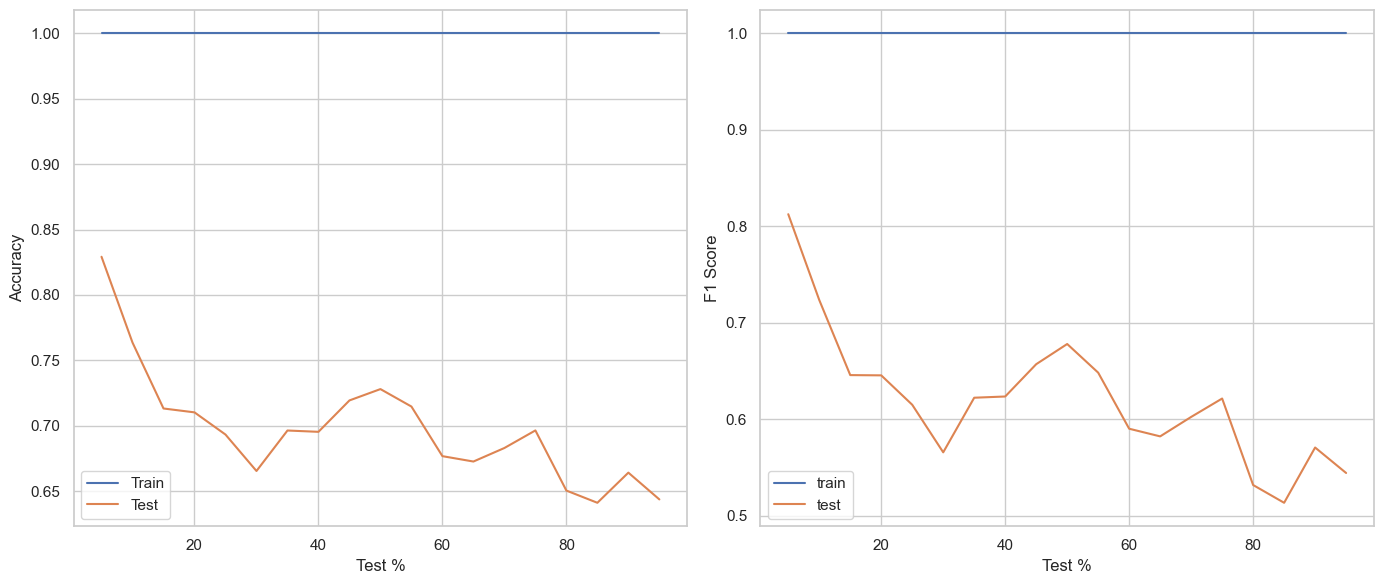

In [44]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_model = DecisionTreeClassifier(random_state=71)

model_training_and_performance_ratio(
    DecisionTree_model,
    df_revised[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']],
    df_revised['stroke']
)

>5, train: 0.772, test: 0.780, f1_train: 0.783,  f1_test: 0.798
>10, train: 0.775, test: 0.755, f1_train: 0.788,  f1_test: 0.774
>15, train: 0.773, test: 0.720, f1_train: 0.783,  f1_test: 0.725
>20, train: 0.769, test: 0.728, f1_train: 0.777,  f1_test: 0.734
>25, train: 0.778, test: 0.729, f1_train: 0.789,  f1_test: 0.734
>30, train: 0.774, test: 0.732, f1_train: 0.783,  f1_test: 0.736
>35, train: 0.777, test: 0.722, f1_train: 0.787,  f1_test: 0.723
>40, train: 0.779, test: 0.726, f1_train: 0.790,  f1_test: 0.728
>45, train: 0.779, test: 0.722, f1_train: 0.788,  f1_test: 0.723
>50, train: 0.777, test: 0.732, f1_train: 0.787,  f1_test: 0.737
>55, train: 0.789, test: 0.727, f1_train: 0.798,  f1_test: 0.729
>60, train: 0.791, test: 0.728, f1_train: 0.800,  f1_test: 0.728
>65, train: 0.791, test: 0.746, f1_train: 0.801,  f1_test: 0.752
>70, train: 0.789, test: 0.755, f1_train: 0.800,  f1_test: 0.768
>75, train: 0.787, test: 0.751, f1_train: 0.797,  f1_test: 0.759
>80, train: 0.757, test: 0

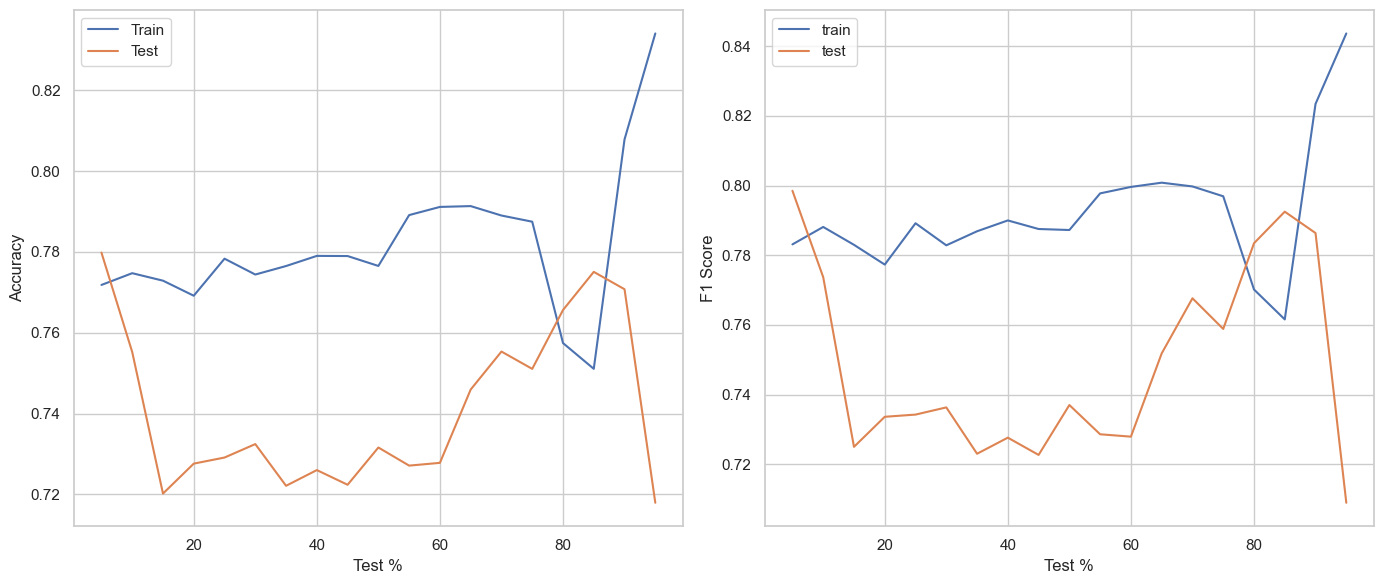

In [45]:
from sklearn.svm import SVC
SVM_model = SVC(random_state=71)

model_training_and_performance_ratio(
    SVM_model,
    df_revised[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']],
    df_revised['stroke']
)

/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

>5, train: 0.823, test: 0.872, f1_train: 0.829,  f1_test: 0.883
>10, train: 0.819, test: 0.828, f1_train: 0.824,  f1_test: 0.840


/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

>15, train: 0.814, test: 0.839, f1_train: 0.819,  f1_test: 0.849
>20, train: 0.825, test: 0.818, f1_train: 0.831,  f1_test: 0.825
>25, train: 0.828, test: 0.797, f1_train: 0.834,  f1_test: 0.799


/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

>30, train: 0.829, test: 0.794, f1_train: 0.834,  f1_test: 0.795
>35, train: 0.832, test: 0.787, f1_train: 0.838,  f1_test: 0.786
>40, train: 0.837, test: 0.792, f1_train: 0.842,  f1_test: 0.790


/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

>45, train: 0.845, test: 0.785, f1_train: 0.850,  f1_test: 0.780
>50, train: 0.841, test: 0.795, f1_train: 0.847,  f1_test: 0.795
>55, train: 0.833, test: 0.797, f1_train: 0.838,  f1_test: 0.800


/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

>60, train: 0.846, test: 0.788, f1_train: 0.852,  f1_test: 0.785
>65, train: 0.839, test: 0.790, f1_train: 0.844,  f1_test: 0.788
>70, train: 0.838, test: 0.796, f1_train: 0.843,  f1_test: 0.797
>75, train: 0.847, test: 0.791, f1_train: 0.853,  f1_test: 0.791


/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chenguiye/opt/anaconda3/envs/class/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

>80, train: 0.806, test: 0.798, f1_train: 0.813,  f1_test: 0.803
>85, train: 0.782, test: 0.793, f1_train: 0.786,  f1_test: 0.799
>90, train: 0.831, test: 0.801, f1_train: 0.837,  f1_test: 0.801
>95, train: 0.867, test: 0.787, f1_train: 0.872,  f1_test: 0.781


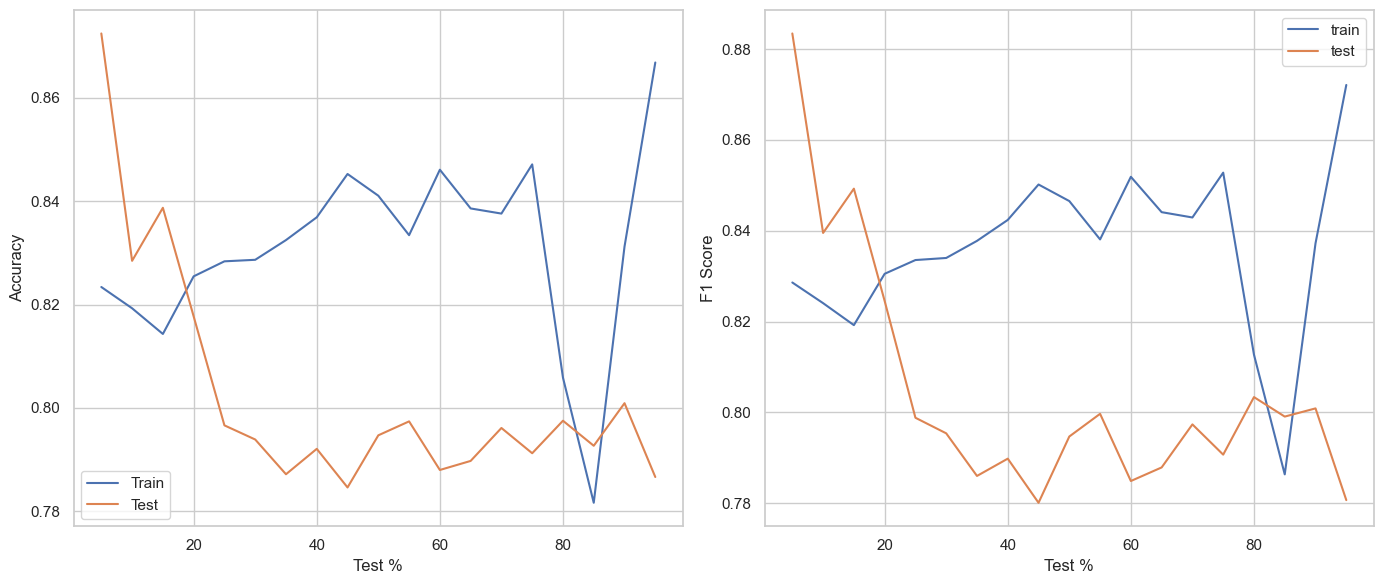

In [46]:
from sklearn import linear_model
Logistic_Regression_model  = linear_model.LogisticRegression(random_state=71)

model_training_and_performance_ratio(
    Logistic_Regression_model,
    df_revised[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']],
    df_revised['stroke']
)

>5, train: 1.000, test: 0.872, f1_train: 1.000,  f1_test: 0.865
>10, train: 1.000, test: 0.753, f1_train: 1.000,  f1_test: 0.701
>15, train: 1.000, test: 0.741, f1_train: 1.000,  f1_test: 0.679
>20, train: 1.000, test: 0.755, f1_train: 1.000,  f1_test: 0.703
>25, train: 1.000, test: 0.752, f1_train: 1.000,  f1_test: 0.699
>30, train: 1.000, test: 0.730, f1_train: 1.000,  f1_test: 0.662
>35, train: 1.000, test: 0.741, f1_train: 1.000,  f1_test: 0.683
>40, train: 1.000, test: 0.735, f1_train: 1.000,  f1_test: 0.674
>45, train: 1.000, test: 0.729, f1_train: 1.000,  f1_test: 0.662
>50, train: 1.000, test: 0.750, f1_train: 1.000,  f1_test: 0.696
>55, train: 1.000, test: 0.756, f1_train: 1.000,  f1_test: 0.705
>60, train: 1.000, test: 0.755, f1_train: 1.000,  f1_test: 0.702
>65, train: 1.000, test: 0.732, f1_train: 1.000,  f1_test: 0.664
>70, train: 1.000, test: 0.739, f1_train: 1.000,  f1_test: 0.683
>75, train: 1.000, test: 0.744, f1_train: 1.000,  f1_test: 0.688
>80, train: 1.000, test: 0

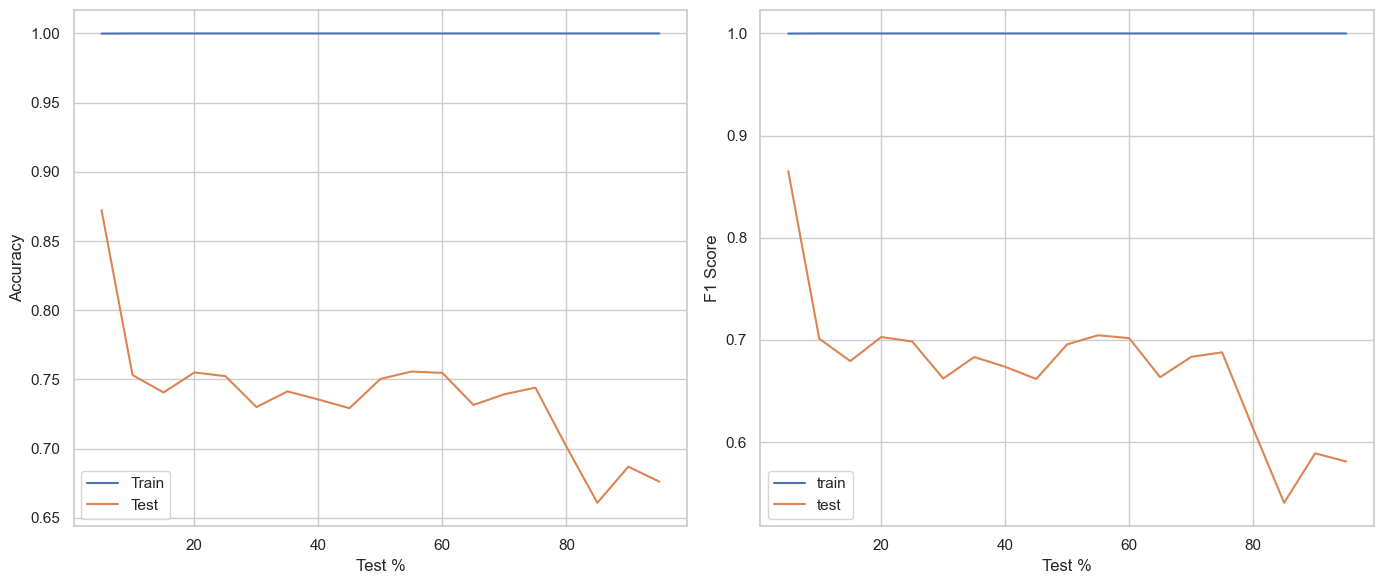

In [47]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier(random_state=71)

model_training_and_performance_ratio(
    RandomForest_model,
    df_revised[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']],
    df_revised['stroke']
)

### 5 fold cross validation

In [48]:
from sklearn.model_selection import StratifiedKFold

def model_training_and_performance_5_fold(model, X, y, k=5):
    smo = SMOTE(random_state=2023)

  
    # Initialize lists to store scores
    train_scores = []
    test_scores = []
    F1_scores = []
  
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
  
    
    train_acc_fold = []
    test_acc_fold = []
    F1_fold = []
  
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
      
        X_train, y_train = smo.fit_resample(X_train, y_train)
        X_test, y_test = smo.fit_resample(X_test, y_test)
      
        model.fit(X_train, y_train)
      
        y_pred_train = model.predict(X_train) # Train
        train_acc = accuracy_score(y_pred_train, y_train)
        train_acc_fold.append(train_acc)
      
        y_pred_test = model.predict(X_test) # Test
        test_acc = accuracy_score(y_pred_test, y_test)
        test_acc_fold.append(test_acc)
      
        F1 = f1_score(y_test, y_pred_test)
        F1_fold.append(F1)
      
    # Calculate average scores for the current test size
    train_scores.append(np.mean(train_acc_fold))
    test_scores.append(np.mean(test_acc_fold))
    F1_scores.append(np.mean(F1_fold))
  
    print('>train: %.3f, test: %.3f, f1_score: %.3f' % (np.mean(train_acc_fold), np.mean(test_acc_fold), np.mean(F1_fold)))


In [49]:
# Convert DataFrame columns to NumPy arrays
X = df_revised[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']].values
y = df_revised['stroke'].values

model_training_and_performance_5_fold(DecisionTreeClassifier(random_state=71),X,y,5)

>train: 1.000, test: 0.882, f1_score: 0.874


### The importance of features

In [50]:
def important_features(model,X,y):
  
  importances = []
  model.fit(X, y)
  importances.append(model.feature_importances_)

  # Plot the feature importances for each model
  n_features = X.shape[1]
  x = np.arange(n_features)
  plt.figure(figsize=(8, 6))
  for i in range(len(importances)):
      indices = np.argsort(importances[i])[::-1]
      sns.barplot(x=importances[i][indices], y=X.columns[indices], palette="viridis")
      plt.xlabel('Importance')
      plt.ylabel('Feature')
      plt.title("What's the important features?")
      plt.xticks(rotation=90)  # Rotate x-axis labels for readability

  plt.tight_layout()
  plt.show()

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/912066879.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[i][indices], y=X.columns[indices], palette="viridis")


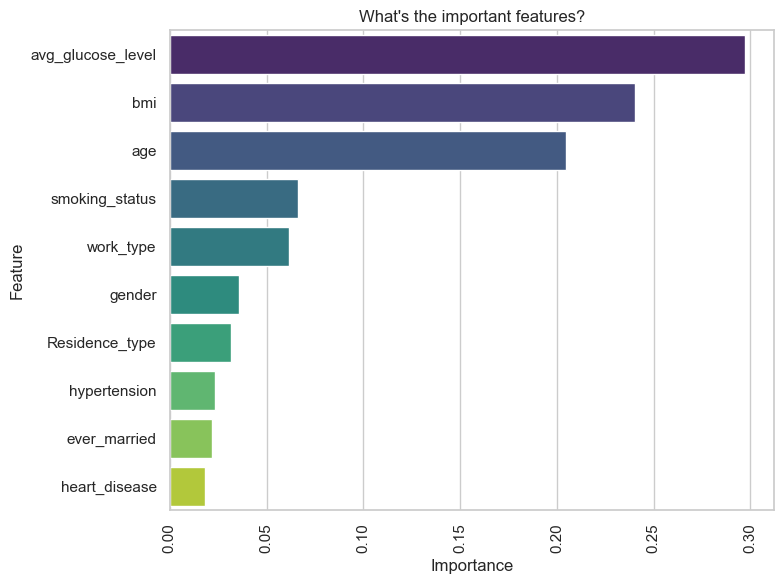

In [51]:
important_features(DecisionTreeClassifier(random_state=71),
                   df_revised[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']],
                   df_revised['stroke'])

### Features' correlation


findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong
findfont: Generic family 'sans-serif' not foun

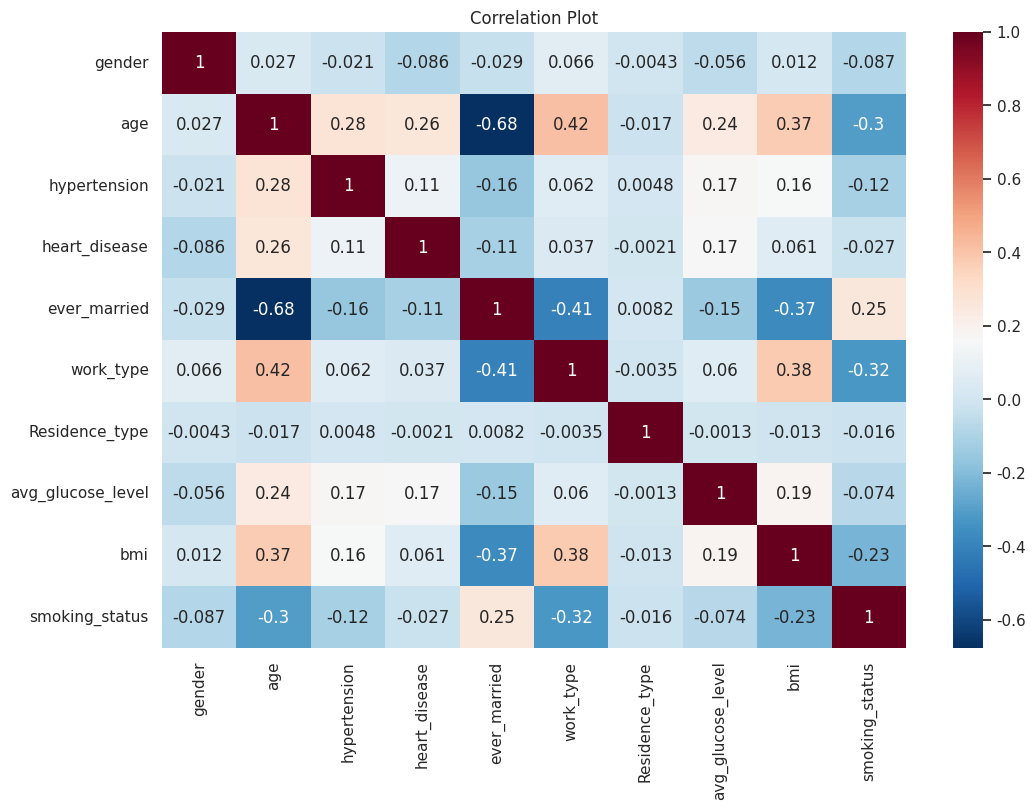

In [52]:
features = df_revised[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]

correlation_matrix = features.corr()

sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = 'STSong'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation Plot')
plt.show()


### Training on removing some features

>5, train: 1.000, test: 0.792, f1_train: 1.000,  f1_test: 0.765
>10, train: 1.000, test: 0.729, f1_train: 1.000,  f1_test: 0.675
>15, train: 1.000, test: 0.712, f1_train: 1.000,  f1_test: 0.647
>20, train: 1.000, test: 0.692, f1_train: 1.000,  f1_test: 0.619
>25, train: 1.000, test: 0.700, f1_train: 1.000,  f1_test: 0.625
>30, train: 1.000, test: 0.679, f1_train: 1.000,  f1_test: 0.600
>35, train: 1.000, test: 0.683, f1_train: 1.000,  f1_test: 0.604
>40, train: 1.000, test: 0.690, f1_train: 1.000,  f1_test: 0.607
>45, train: 1.000, test: 0.687, f1_train: 1.000,  f1_test: 0.603
>50, train: 1.000, test: 0.688, f1_train: 1.000,  f1_test: 0.611
>55, train: 1.000, test: 0.701, f1_train: 1.000,  f1_test: 0.624
>60, train: 1.000, test: 0.667, f1_train: 1.000,  f1_test: 0.575
>65, train: 1.000, test: 0.695, f1_train: 1.000,  f1_test: 0.619
>70, train: 1.000, test: 0.697, f1_train: 1.000,  f1_test: 0.629
>75, train: 1.000, test: 0.682, f1_train: 1.000,  f1_test: 0.591
>80, train: 1.000, test: 0

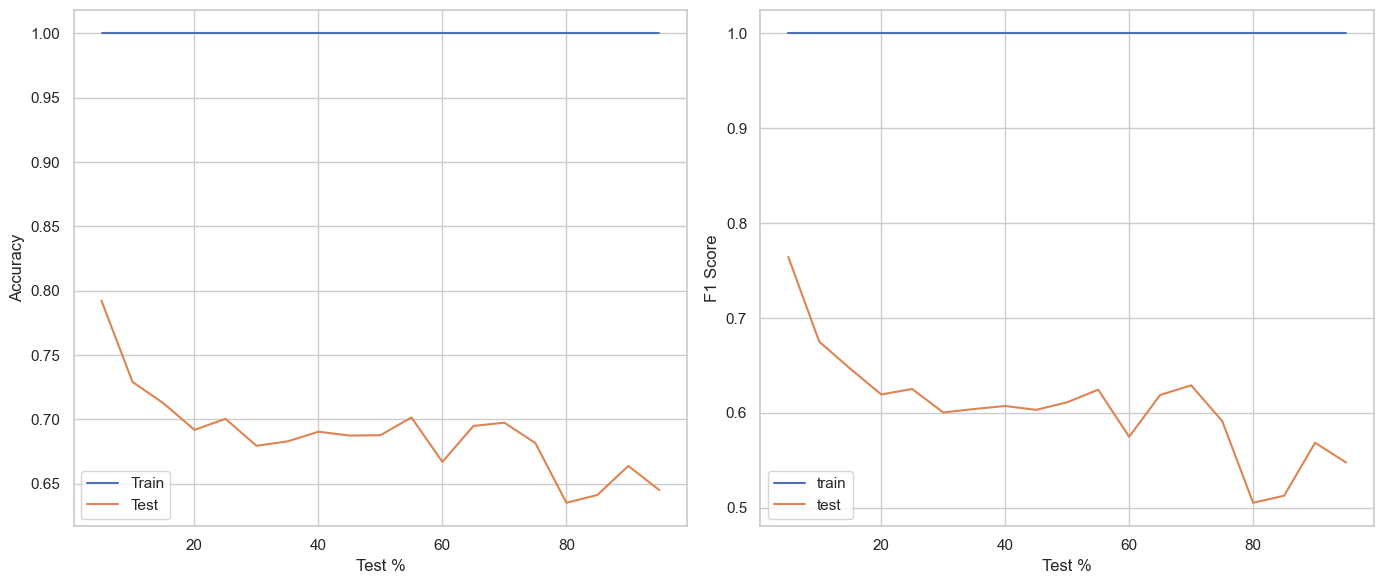

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_training_and_performance_ratio(DecisionTreeClassifier(random_state=71),
                               df_revised[['gender','age','hypertension','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']],
                               df_revised['stroke'])

In [54]:
X2 = df_revised[['gender','age','hypertension','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']].values
y2 = df_revised['stroke'].values
model_training_and_performance_5_fold(DecisionTreeClassifier(random_state=71),X2,y2,5)

>train: 1.000, test: 0.870, f1_score: 0.861


## Prediction

### 5-fold cross validation(Decision tree)

In [55]:
model1 = DecisionTreeClassifier()
smo = SMOTE(random_state=2023)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_acc_fold = []
test_acc_fold = []
F1_fold = []
X = df_revised[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']].values
y = df_revised['stroke'].values
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    X_train, y_train = smo.fit_resample(X_train, y_train)
    X_test, y_test = smo.fit_resample(X_test, y_test)
  
    model1.fit(X_train, y_train)
  
    y_pred_train = model1.predict(X_train) # Train
    train_acc = accuracy_score(y_pred_train, y_train)
    train_acc_fold.append(train_acc)
  
    y_pred_test = model1.predict(X_test) # Test
    test_acc = accuracy_score(y_pred_test, y_test)
    test_acc_fold.append(test_acc)
  
    F1 = f1_score(y_test, y_pred_test)
    F1_fold.append(F1)
  
# Calculate average scores for the current test size
train_acc_fold.append(np.mean(train_acc_fold))
test_acc_fold.append(np.mean(test_acc_fold))
F1_fold.append(np.mean(F1_fold))
print('>train: %.3f, test: %.3f, f1_score: %.3f' % (np.mean(train_acc_fold), np.mean(test_acc_fold), np.mean(F1_fold)))

>train: 1.000, test: 0.881, f1_score: 0.873


In [56]:
model2 = DecisionTreeClassifier()
X = df_revised[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y = df_revised['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=71, shuffle = True)
X_train, y_train = smo.fit_resample(X_train, y_train)
X_test, y_test = smo.fit_resample(X_test, y_test)
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
import random

# 從 X 資料框中隨機選取一行
X = df_revised[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]



result = pd.DataFrame(columns=["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type",
                               "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "stroke", "prediction"])

count = 0
for _ in range(500):
    random_row = X.sample()
    label = df_revised.loc[random_row.index, 'stroke'].values[0]
    
    y_pred = model2.predict(random_row)
    
    # 查看隨機選取的行和對應的 label
    print(f"input:{random_row}")
    print(f"stroke:{label}")
    print(f"prediction{y_pred}")

    if label == y_pred:
        count += 1

    result = result.append({
        'gender': random_row['gender'].values[0],
        'age': random_row['age'].values[0],
        'hypertension': random_row['hypertension'].values[0],
        'heart_disease': random_row['heart_disease'].values[0],
        'ever_married': random_row['ever_married'].values[0],
        'work_type': random_row['work_type'].values[0],
        'Residence_type': random_row['Residence_type'].values[0],
        'avg_glucose_level': random_row['avg_glucose_level'].values[0],
        'bmi': random_row['bmi'].values[0],
        'smoking_status': random_row['smoking_status'].values[0],
        'stroke': label,
        'prediction': y_pred
    }, ignore_index=True)

result.to_excel("statistic/prediction.xlsx", engine="openpyxl")


input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
3334       2  38.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3334               2             107.78  25.1               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
3440       2  58.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3440               2              196.5  37.7               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
1311       2  37.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1311               1              70.75  35.8               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  w

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:     gender   age  hypertension  heart_disease  ever_married  work_type  \
917       2  26.0             0              0             1          2   

     Residence_type  avg_glucose_level   bmi  smoking_status  
917               1              82.61  28.5               2  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
2594       2  73.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2594               2              98.34  30.9               3  
stroke:0
prediction[0]
input:     gender   age  hypertension  heart_disease  ever_married  work_type  \
561       2  74.0             0              0             0          2   

     Residence_type  avg_glucose_level   bmi  smoking_status  
561               2              68.34  39.3               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1


stroke:0
prediction[0]
input:      gender  age  hypertension  heart_disease  ever_married  work_type  \
4531       2  7.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
4531               1             128.17  18.9               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
3902       2  31.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3902               2              70.91  28.3               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
1476       2  62.0             0              0             0          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1476               2              73.44  23.4               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_di

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
2080       1  49.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2080               1             130.07  26.0               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
4324       1  54.0             0              0             0          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
4324               2              81.78  27.3               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
2593       1  58.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2593               2              78.93  40.7               1  
stroke:0
prediction[0]
input:     gender   age  hypertension  heart_disease  ever_married  wo

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:      gender  age  hypertension  heart_disease  ever_married  work_type  \
3628       1  4.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3628               2              90.42  16.2               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
4171       2  63.0             0              0             0          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
4171               1              60.67  28.9               1  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
1470       1  61.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1470               2              89.75  25.4               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  wor

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:     gender   age  hypertension  heart_disease  ever_married  work_type  \
565       2  66.0             0              0             0          3   

     Residence_type  avg_glucose_level   bmi  smoking_status  
565               1              92.04  23.1               0  
stroke:0
prediction[0]
input:      gender  age  hypertension  heart_disease  ever_married  work_type  \
1340       2  2.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1340               2              65.96  19.7               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
3143       2  78.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3143               2             198.12  29.1               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_ty

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
1248       1  68.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1248               1             155.17  35.5               0  
stroke:0
prediction[0]
input:      gender  age  hypertension  heart_disease  ever_married  work_type  \
3426       2  7.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3426               2              89.38  19.0               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
1316       2  17.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1316               1              70.01  43.0               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  wor

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
4057       2  79.0             1              0             0          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
4057               2              76.64  19.5               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
3505       1  45.0             0              0             0          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3505               1              55.47  19.8               2  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
2350       2  67.0             0              0             0          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2350               2              80.18  22.9               1  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  w

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
2250       2  77.0             0              0             0          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2250               2             167.59  34.3               1  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
2161       1  54.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2161               2             206.52  35.4               2  
stroke:0
prediction[0]
input:     gender   age  hypertension  heart_disease  ever_married  work_type  \
542       1  31.0             0              0             0          2   

     Residence_type  avg_glucose_level   bmi  smoking_status  
542               2             114.32  27.7               2  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:    gender   age  hypertension  heart_disease  ever_married  work_type  \
22       2  65.0             0              0             0          2   

    Residence_type  avg_glucose_level   bmi  smoking_status  
22               2             100.98  28.2               1  
stroke:1
prediction[1]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
3927       2  11.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3927               1             102.76  20.3               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
4413       2  81.0             1              0             0          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
4413               1             174.54  26.4               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
1567       1  36.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1567               2             233.52  40.9               0  
stroke:0
prediction[0]
input:     gender  age  hypertension  heart_disease  ever_married  work_type  \
524       1  5.0             0              0             1          0   

     Residence_type  avg_glucose_level   bmi  smoking_status  
524               2              163.7  18.4               3  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_type  \
4196       1  54.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
4196               2              57.56  27.5               0  
stroke:0
prediction[0]
input:      gender   age  hypertension  heart_disease  ever_married  work_ty

/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv18wqyt50f6qxr0000gn/T/ipykernel_13561/2964414098.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/s3/53jd_q6j3wv1

### Calculate the prediction accuracy

In [58]:
accuracy = count / 500
print("Accuracy: {}".format(accuracy))

Accuracy: 0.968
